# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

# Understand the Data
One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [Freetocode](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) 

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [Freetocode](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/). The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.mode.chained_assignment = None
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False, delimiter=',')
# view all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
df.shape

(18175, 136)

The data contains a lot of information that could be useful for us. For example, columns include location, Money for learning, Job preferences and information on where they learn. All of this will help alot but we do not yet know if this sample is actually useful for our analysis. We are working for a company that focuses mainly on web development and mobile development. So, let's make sure that these interests are well represented in the survey:

In [3]:
df['JobRoleInterest'].unique()


array([nan, 'Full-Stack Web Developer',
       '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer',
       ...,
       '  Data Scientist, Game Developer,   Quality Assurance Engineer',
       'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin',
       '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist '],
      dtype=object)

In [4]:
df['JobRoleInterest'].describe()

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

Just from looking through the most popular responses in the 'JobRoleInterest' column doesn't help too much. We can see that the most popular repsonses seem to involve Web development but responders can give multiple responses which means we have 3212 unique responses. Does this indicate that most are unsure of what they are interested in learning? let's take a look.

# Checking for Sample Representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant

In [5]:
df['JobRoleInterest'].value_counts().sum()

6992

In [6]:
df['JobRoleInterest'].isnull().sum()

11183

In [7]:
df['JobRoleInterest']=df['JobRoleInterest'].fillna('No Answer')

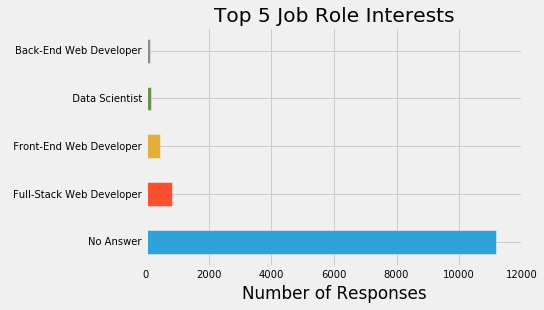

In [8]:
plt.style.use('fivethirtyeight')
df['JobRoleInterest'].value_counts().head(5).plot.barh(fontsize = 10)
plt.title('Top 5 Job Role Interests')
plt.xlabel('Number of Responses')

From the table and chart above we can see that over 61% of respondents left the 'JobRoleInterest' field empty. Ideally I would want this field to have been completed by everyone. This does impact the conclusion that can be drawn from this survey. 

Also, the information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in data science field.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. 


In [9]:
web_or_mobile = df['JobRoleInterest'].dropna().str.contains(
    'Web Developer|Mobile Developer') 
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

False    66.822558
True     33.177442
Name: JobRoleInterest, dtype: float64


In [10]:
df_clear_interest = df[df['JobRoleInterest'] != 'No Answer'].copy()
df_clear_interest['JobRoleInterest']=df_clear_interest['JobRoleInterest'].str.split(',')

# Frequency table for the var describing the number of interests
df_clear_interest['JobRoleInterest'] = df_clear_interest['JobRoleInterest'].apply(lambda x: len(x))
df_clear_interest['JobRoleInterest'].value_counts(normalize=True)*100


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.


The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [11]:
category={'web':0, 'mobile':0, 'Other':0}
import re
for role in df['JobRoleInterest']:
    if re.search ('[Ww]eb', role):
        category['web'] += 1
    elif re.search('[Mm]obile', role):
        category['mobile'] += 1
    else:
        category['Other'] += 1
    
df_category=pd.DataFrame.from_dict(data=category, orient ='index')
df_category.rename(columns={0:'Total'}, inplace=True)
df_category

,Total
web,5781
mobile,254
Other,12140


(0, 15000)

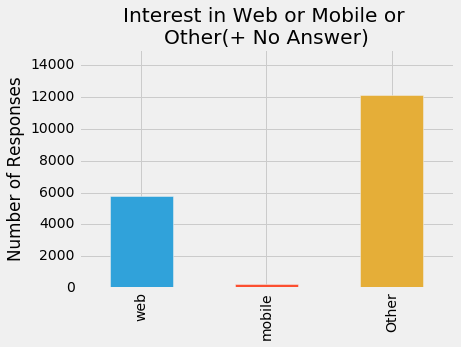

In [12]:
plt.style.use('fivethirtyeight')
df_category['Total'].plot.bar()
plt.title('Interest in Web or Mobile or \nOther(+ No Answer)')
plt.ylabel('Number of Responses')
plt.ylim(0,15000)

These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.

# New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [13]:
# Isolate the participants that answered what role they'd be interested in
df_answered = df[df['JobRoleInterest'] != 'No Answer'].copy()


In [14]:
absolute_frequency = df_answered['CountryLive'].value_counts()
relative_frequency = df_answered['CountryLive'].value_counts(normalize=True)*100


In [15]:
pd.DataFrame(data={'absolute_frequency':absolute_frequency, 'relative_frequency': relative_frequency})


,absolute_frequency,relative_frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. With USA being the most populous area of students, it is going to be 1 of the 2 markets I suggest advertising in. However, before deciding on India as the second choice we need to also check how much money each customer is able to spend.

I am going to narrow things down to the top 4 countries in the chart above. These are 4 countries with English as an official language(the programming courses are in English) and are also a fair bit ahead of the 5th most common country.

# How much do students spend on learning?

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

- These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

By creating a new column `MoneySpentPerMonth` which is derivedfrom dividing 'MoneyForLearning' by 'MonthsProgramming', the problems will easier to solve.

In [16]:
df_answered['MonthsProgramming'].isnull().sum()

359

In [17]:
df_answered['MonthsProgramming'].min()

0.0

We can see from above that 'MonthsProgramming' has null values and a minimum value of 0. To avoid infinity in 'MoneySpentPerMonth' I will replace the null values and 0 with 1.



In [18]:
df_answered['MonthsProgramming'] = df_answered['MonthsProgramming'].apply(lambda x : x+1 if x==0 else x)

In [19]:
df_answered['MonthsProgramming'].fillna(1)

1          6.0
2          5.0
3          5.0
4         24.0
6         12.0
9         18.0
11         1.0
13         1.0
14         9.0
15         1.0
16        12.0
18        14.0
19        28.0
21         3.0
22        14.0
23         2.0
28        12.0
29         1.0
30         3.0
31         1.0
32         6.0
33         6.0
34         1.0
35        25.0
37         1.0
40         8.0
41        32.0
42         2.0
43         5.0
52        12.0
55         3.0
58        60.0
63         6.0
64         2.0
66        18.0
67        28.0
68        14.0
70         3.0
84        12.0
88         2.0
89        19.0
93        24.0
97         3.0
99         3.0
100        1.0
105        2.0
108       24.0
110       36.0
112       24.0
113       30.0
114       48.0
116        1.0
118        9.0
129       10.0
131       60.0
133       24.0
136        5.0
137       24.0
139       18.0
144       36.0
145       15.0
148       40.0
151        3.0
153        2.0
154        2.0
156       14.0
158       

In [20]:
df_answered['MoneySpentPerMonth'] = round(df_answered['MoneyForLearning'] / df_answered['MonthsProgramming'],2)
df_answered['MoneySpentPerMonth'].isnull().sum()

675

In [21]:
# Keep only the rows with non-nulls in the `money_per_month` column 
df_answered=df_answered[df_answered['MoneySpentPerMonth'].notnull()]

In [22]:
# Remove the rows with null values in 'CountryLive'
df_answered=df_answered[df_answered['CountryLive'].notnull()]

In [23]:
mean_average=df_answered.groupby('CountryLive').mean()
mean_average['MoneySpentPerMonth'][['United States of America', 'India', 'United Kingdom','Canada']]

CountryLive
United States of America    227.998023
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: MoneySpentPerMonth, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

In [24]:
top_4=df_answered[df_answered['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



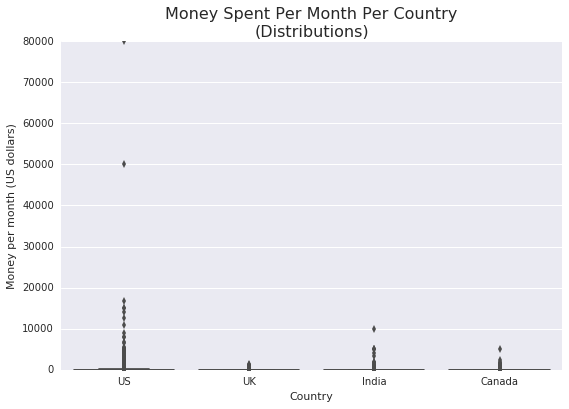

In [25]:
import seaborn as sns
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [26]:
df_answered=df_answered[df_answered['MoneySpentPerMonth'] < 20000]

In [27]:
new_mean = df_answered.groupby('CountryLive').mean()
new_mean['MoneySpentPerMonth'][['United States of America', 'India', 'United Kingdom','Canada']]

CountryLive
United States of America    183.800136
India                       135.101102
United Kingdom               45.534337
Canada                      113.510958
Name: MoneySpentPerMonth, dtype: float64

In [28]:
top_4=df_answered[df_answered['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



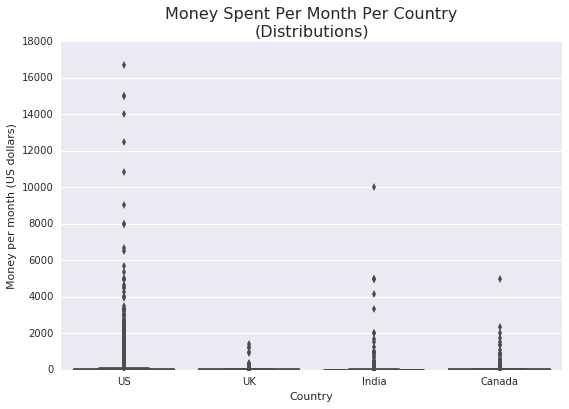

In [29]:
import seaborn as sns
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

I am going to use z score to remove some of the extreme outliers from each country. Usually, anything with a z score above 3 would be removed. However, I do expect quite a lot of variance in the data because of the difference in spending between learners who study for free online and thos who pay for expensive coding bootcamps. I will therefore remove any that have a z score above 10.


In [30]:
grouped_mean=top_4.groupby('CountryLive')['MoneySpentPerMonth'].transform('mean')


In [31]:
grouped_std=top_4.groupby('CountryLive')['MoneySpentPerMonth'].transform('std')
top_4['group_mean'] = grouped_mean
top_4['group_std'] = grouped_std

In [32]:
top_4['z_score'] = (top_4['MoneySpentPerMonth'] - top_4['group_mean']) / top_4['group_std']
top_4 =top_4[top_4["z_score"] < 10]


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



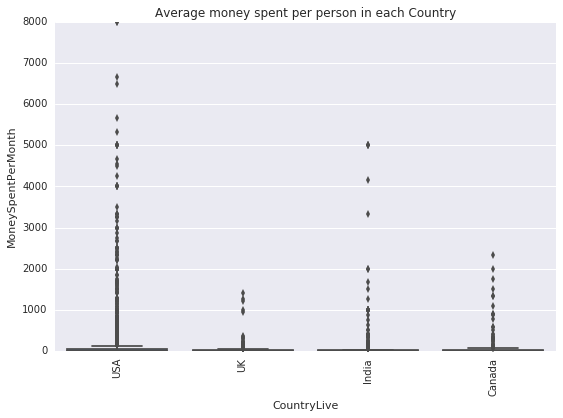

In [33]:
ax = sns.boxplot(x = 'CountryLive', y = 'MoneySpentPerMonth', data = top_4)
ax.set_title('Average money spent per person in each Country')
ax.set_xticklabels(labels = ['USA', 'UK', 'India', 'Canada'],  rotation=90)
ax.tick_params(left=False, bottom=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

From the looking at the chart above I will take any spend above 5000 to be an outlier.

In [34]:
remove_outliers_final= top_4[top_4['MoneySpentPerMonth'] < 5000]
final_mavg = remove_outliers_final.groupby(['CountryLive']).mean()
final_mavg['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    130.639042
India                        81.812222
United Kingdom               45.534337
Canada                       93.065397
Name: MoneySpentPerMonth, dtype: float64

In [35]:
summary_df = pd.DataFrame()
mean_age=top_4.groupby(['CountryLive']).mean()
summary_df['Mean_Age']=mean_age['Age'][['United States of America','India','United Kingdom','Canada']].astype(int)
summary_df['MeanMoneySpentPerMonth']= final_mavg['MoneySpentPerMonth']
summary_df['TotalPersonsPerCountry'] = remove_outliers_final['CountryLive'].value_counts()
summary_df

,Mean_Age,MeanMoneySpentPerMonth,TotalPersonsPerCountry
CountryLive,,,
United States of America,29,130.639042,2913
India,21,81.812222,459
United Kingdom,28,45.534337,279
Canada,26,93.065397,239


From the table above we can see that the top two markets are USA and India. Canada has a higher mean monthly spend but from this sample its customer size is half that of india. The UK does not pass our monthly spend threshold of 59. It is also interesting to find out Indians seem to be interested in coding in their early 20s compared to other countries. 

Removing all the outliers from the box plot leaves us with the following average money spent shown above. Before giving the final verdict I am going to make a couple more charts. The first will show the total number of potential customers in each country who spend enough for a monthly subscription. The second will show the total money spent by all learners from each country. This will give a good idea of the total potnetial customers and revenue available in each market. 

# Market Potential

In [37]:
remove_outliers_final= top_4[top_4['MoneySpentPerMonth'] < 5000]
money_per_region = top_4.groupby('CountryLive')['MoneySpentPerMonth'].mean()


In [38]:
# Number who spend above 59 dollars in each country
india_spend_enough = len(top_4[(top_4['CountryLive'] == 'India') &
                                 (top_4['MoneyForLearning'] > 59)])
                               
canada_spend_enough = len(top_4[(top_4['CountryLive'] == "Canada") &
                                 (top_4['MoneyForLearning'] > 59)])

usa_spend_enough = len(top_4[(top_4['CountryLive'] == 'United States of America') &
                                 (top_4['MoneyForLearning'] > 59)])

In [39]:
spend_enough = [canada_spend_enough, india_spend_enough, usa_spend_enough]
canada_meanxpotential = money_per_region['Canada'] * len(top_4[top_4['CountryLive'] == "Canada"])
india_meanxpotential = money_per_region["India"] * len(top_4[top_4["CountryLive"] == "Canada"])
usa_meanxpotential = money_per_region["United States of America"] * len(top_4[top_4["CountryLive"] == "United States of America"])


In [61]:
meanxpotential = [canada_meanxpotential, india_meanxpotential, usa_meanxpotential]
potential_customers = pd.DataFrame([spend_enough, meanxpotential])
potential_customers.columns = ['Canada', 'India', 'USA']
potential_customers.index = ['Total Spend > 59', 'Spend X potential Customers']
potential_customers

,Canada,India,USA
Total Spend > 59,85.00,156.000000,1283.0
Spend X potential Customers,22242.63,27185.893052,445718.2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b0a8a9b0>],
      dtype=object)

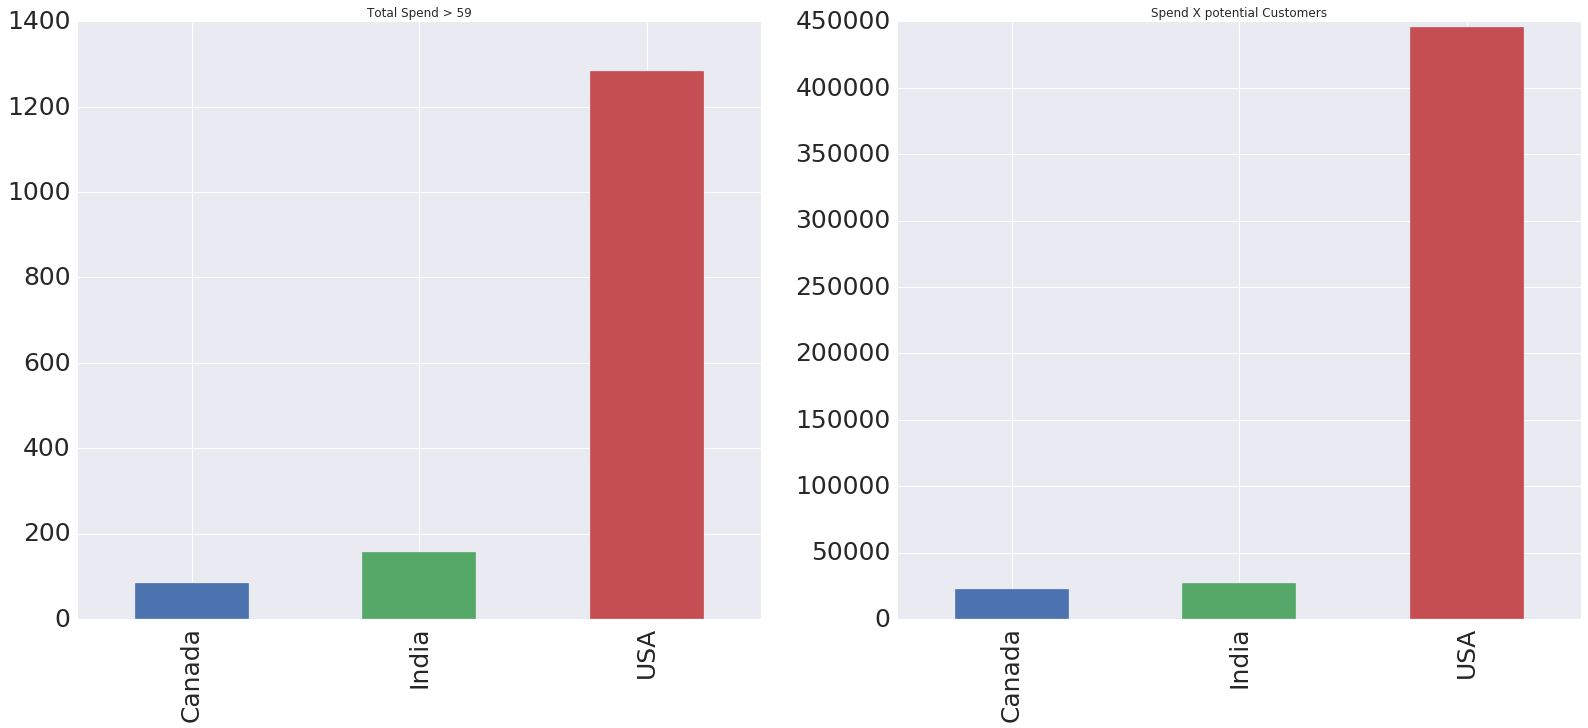

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
potential_customers.iloc[0].plot(kind="bar", ax=axes[0], subplots=True, fontsize=25)
potential_customers.iloc[1].plot(kind="bar", ax=axes[1], subplots=True, fontsize=25)

If it wasn't clear already the USA is by far the best market to advertise in. With both the highest number of potential customers and the highest mean spend the US market dwarfs the competition. The chart on the left shows that the US has over 6X the number of potential customers who spend more than the subscription price per month. 

The chart on the right shows how much more potential money is in the US market. India has more potential customers who spend at least the subscription cost per month- 

# Conclusion

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

- 60% for the US, 25% for India, 15% for Canada.
- 50% for the US, 30% for India, 20% for Canada; etc.

Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

- 70% for the US, and 30% for India.
- 65% for the US, and 35% for Canada; etc.
- Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.